<a href="https://colab.research.google.com/github/Yasir323/Statistics-in-Python/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
state = pd.read_csv('/content/gdrive/My Drive/psds_data/state.csv')

In [3]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


# Mean

In [4]:
state.Population.mean()

6162876.3

# Trimmed mean

In [5]:
from scipy.stats import trim_mean

In [6]:
trim_mean(state.Population, 0.1)

4783697.125

# Weighted Mean

In [7]:
import numpy as np

In [8]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

# Median

In [9]:
state.Population.median()

4436369.5

In [13]:
state['Murder.Rate'].median()

4.0

# Weighted Median

In [10]:
# !pip install wquantiles

In [11]:
import wquantiles as wq

In [12]:
wq.median(state['Murder.Rate'], weights=state['Population'])

4.4

# Standard Deviation

In [15]:
std_dev = state.Population.std()
std_dev

6848235.347401142

# Interquartile Range

In [16]:
iqr = state.Population.quantile(0.75) - state.Population.quantile(0.25)
iqr

4847308.0

# Median Absolute Deviation (MAD)

In [22]:
from statsmodels.robust.scale import mad

In [23]:
med_abs_dev = mad(state.Population)
med_abs_dev

3849876.1459979336

# Mean absolute deviation

In [24]:
mean_abs_dev = state.Population.mad()
mean_abs_dev

4450933.356000001

# Quantiles

In [26]:
quantiles = state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
quantiles

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

# Boxplot

Text(0, 0.5, 'Population(Millions)')

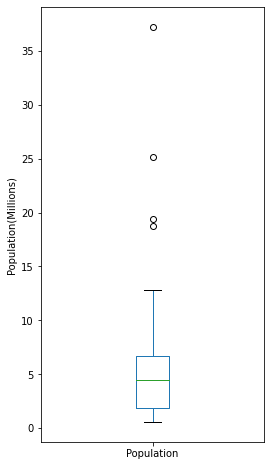

In [35]:
ax = (state['Population'] / 1000000).plot.box(figsize=(4, 8))
ax.set_ylabel('Population(Millions)')

# Binning

In [28]:
binned_population = pd.cut(state.Population, 10)

In [30]:
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

# Histograms

Text(0, 0.5, 'Population(Millions)')

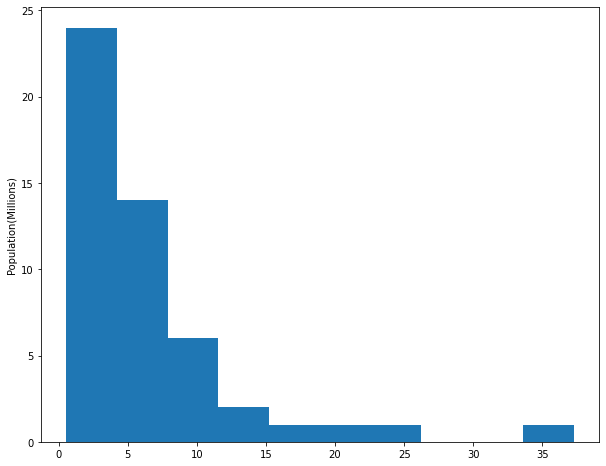

In [36]:
ax = (state['Population'] / 1000000).plot.hist(figsize=(10, 8))
ax.set_ylabel('Population(Millions)')